# Bayes classifier-Unimodal Gaussian density 

##  Covariance matrix is diagonal and is different for each class

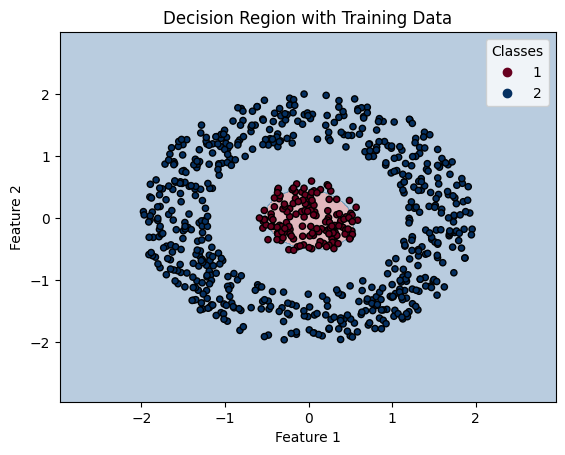

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Step 1: Load the datasets
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # Features (first two columns)
    y = data[:, -1]   # Labels (last column)
    return X, y

# Load train, test, and validation datasets
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt')
X_test, y_test = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt')
X_val, y_val = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_val.txt')

# Step 2: Compute mean and covariance for each class
def compute_class_parameters(X, y, classes):
    means = {}
    covariances = {}
    priors = {}
    
    for c in classes:
        X_c = X[y == c]
        means[c] = np.mean(X_c, axis=0)
        covariances[c] = np.cov(X_c, rowvar=False)
        priors[c] = X_c.shape[0] / X.shape[0]
    
    return means, covariances, priors

# Calculate parameters for each class
classes = np.unique(y_train)
means, covariances, priors = compute_class_parameters(X_train, y_train, classes)

# Step 3: Define the Bayes classifier
def bayes_classifier(X, means, covariances, priors):
    likelihoods = []
    for c in classes:
        mean = means[c]
        covariance = covariances[c]
        prior = priors[c]
        # Calculate the likelihood using multivariate normal distribution
        likelihood = multivariate_normal.pdf(X, mean=mean, cov=covariance)
        posterior = likelihood * prior
        likelihoods.append(posterior)
    
    # Assign label with highest posterior probability
    likelihoods = np.array(likelihoods)
    return np.argmax(likelihoods, axis=0)

# Step 4: Make predictions
y_pred_train = bayes_classifier(X_train, means, covariances, priors)
y_pred_test = bayes_classifier(X_test, means, covariances, priors)
y_pred_val = bayes_classifier(X_val, means, covariances, priors)

# Step 5: Visualize decision regions with legend
def plot_decision_regions(X, y, means, covariances, priors, classes):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = bayes_classifier(np.c_[xx.ravel(), yy.ravel()], means, covariances, priors)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    
    # Plot training data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', s=20)
    
    # Create legend
    handles, labels = scatter.legend_elements()
    plt.legend(handles, labels, title="Classes")
    
    plt.title("Decision Region with Training Data")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision regions with training data
plot_decision_regions(X_train, y_train, means, covariances, priors, classes)


### Decision plot with testing data

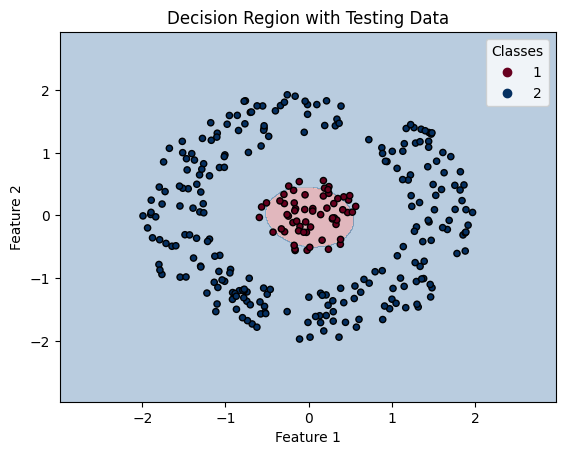

In [13]:
# Step 5: Visualize decision regions with legend
def plot_decision_regions(X, y, means, covariances, priors, classes):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = bayes_classifier(np.c_[xx.ravel(), yy.ravel()], means, covariances, priors)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    
    # Plot training data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', s=20)
    
    # Create legend
    handles, labels = scatter.legend_elements()
    plt.legend(handles, labels, title="Classes")
    
    plt.title("Decision Region with Testing Data")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision regions with training data
plot_decision_regions(X_test, y_test, means, covariances, priors, classes)

### Evaluation Metrics

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from scipy.stats import multivariate_normal

# Assuming X_test and y_test are the test data features and true labels
# X_test, y_test = load_data('test.txt')

# Step 1: Define the Bayes classifier (as before)
def bayes_classifier(X, means, covariances, priors):
    likelihoods = []
    for c in classes:
        mean = means[c]
        covariance = covariances[c]
        prior = priors[c]
        # Calculate the likelihood using multivariate normal distribution
        likelihood = multivariate_normal.pdf(X, mean=mean, cov=covariance)
        posterior = likelihood * prior
        likelihoods.append(posterior)
    
    # Assign label with highest posterior probability
    likelihoods = np.array(likelihoods)
    return np.argmax(likelihoods, axis=0)

# Step 2: Make predictions on the test data
y_pred_test = bayes_classifier(X_test, means, covariances, priors)

# Map the predicted labels (0, 1) to (1, 2)
y_pred_test_mapped = np.where(y_pred_test == 0, 1, 2)


# Step 3: Classification accuracy
accuracy = accuracy_score(y_test, y_pred_test_mapped)

# Step 4: Precision, recall, and F-measure for each class
precision_per_class = precision_score(y_test, y_pred_test_mapped, labels=[1, 2], average=None)
recall_per_class = recall_score(y_test, y_pred_test_mapped, labels=[1, 2], average=None)
f_measure_per_class = f1_score(y_test, y_pred_test_mapped, labels=[1, 2], average=None)

# Step 5: Mean precision, recall, and F-measure
mean_precision = precision_per_class.mean()
mean_recall = recall_per_class.mean()
mean_f_measure = f_measure_per_class.mean()

# Step 6: Display results
print("Classification Accuracy:", accuracy)
for i, class_label in enumerate([1, 2]):
    print(f"Class {class_label}:")
    print(f"  Precision: {precision_per_class[i]}")
    print(f"  Recall: {recall_per_class[i]}")
    print(f"  F-measure: {f_measure_per_class[i]}")
    
print("\nMean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F-measure:", mean_f_measure)


Classification Accuracy: 0.9266666666666666
Class 1:
  Precision: 1.0
  Recall: 0.6333333333333333
  F-measure: 0.7755102040816326
Class 2:
  Precision: 0.916030534351145
  Recall: 1.0
  F-measure: 0.9561752988047809

Mean Precision: 0.9580152671755725
Mean Recall: 0.8166666666666667
Mean F-measure: 0.8658427514432068


### Confusion matrix

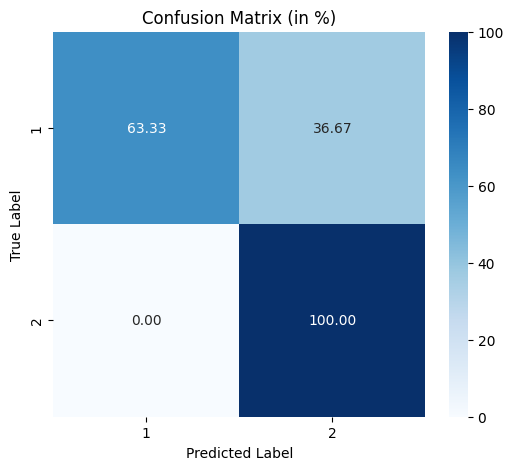

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred_test_mapped, labels=[1, 2])

# Step 2: Normalize confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Step 3: Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=[1, 2], yticklabels=[1, 2])
plt.title("Confusion Matrix (in %)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
